## Johnson & Johnson quarterly earnings per share

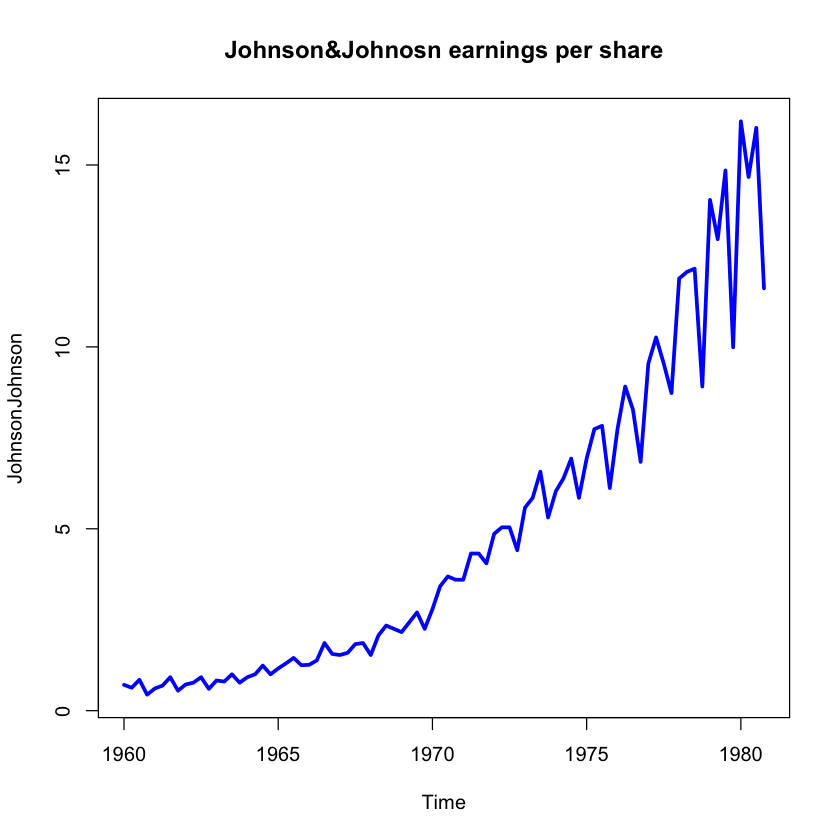

In [1]:
plot(JohnsonJohnson, main='Johnson&Johnosn earnings per share', col='blue', lwd=3)

In [2]:
# log return of JJ
jj.log.return = diff(log(JohnsonJohnson))
jj.log.return.mean.zero = jj.log.return -mean(jj.log.return)

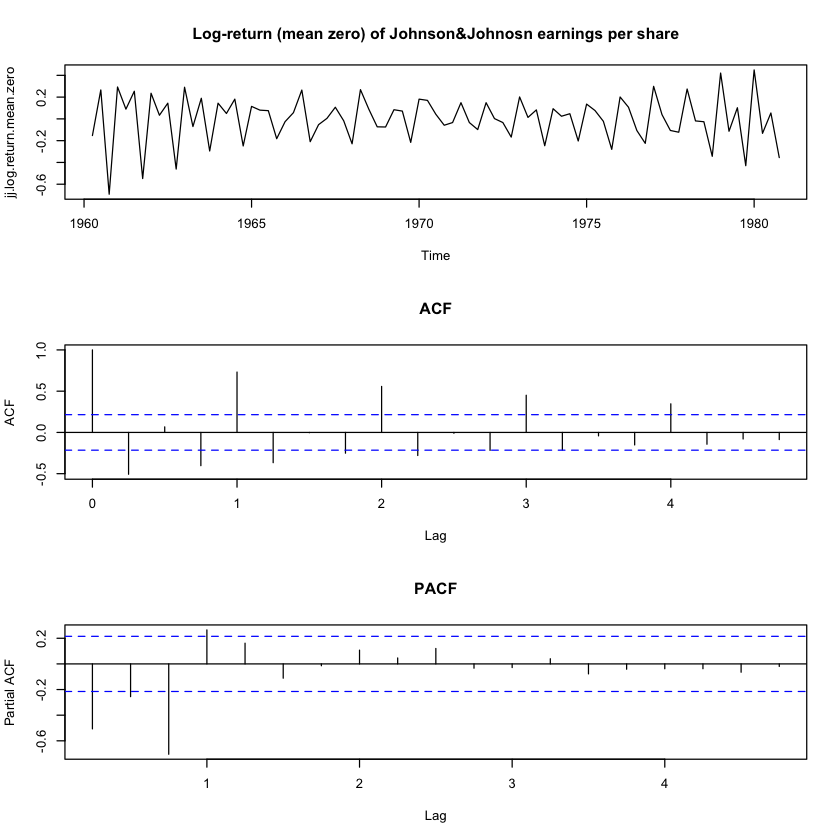

In [3]:
# Plots for log-returns
par(mfrow=c(3,1))
plot(jj.log.return.mean.zero, main='Log-return (mean zero) of Johnson&Johnosn earnings per share')
acf(jj.log.return.mean.zero, main='ACF')
pacf(jj.log.return.mean.zero, main='PACF')

In [4]:
# Order
p=4

In [5]:
# sample autocorreleation function r
r=NULL
r[1:p]=acf(jj.log.return.mean.zero, plot=F)$acf[2:(p+1)]
r

[1] -0.50681760  0.06710084 -0.40283604  0.73144780

In [8]:
# matrix R
R=matrix(1,p,p) # matrix of dimension 4 by 4, with entries all 1's.

# define non-diagonal entires of R
for(i in 1:p){
    for(j in 1:p){
        if(i!=j)
            R[i,j]=r[abs(i-j)]
        }
}
round(R,2)

1.00,-0.51,0.07,-0.40
-0.51,1.00,-0.51,0.07
0.07,-0.51,1.00,-0.51
-0.40,0.07,-0.51,1.00


In [9]:
# b-column vector on the right
b=matrix(r,p,1)# b- column vector with no entries
b

-0.50681760
0.06710084
-0.40283604
0.73144780


In [10]:
phi.hat=solve(R,b)[,1]
phi.hat

[1] -0.6293492 -0.5171526 -0.4883374  0.2651266

In [11]:
# Variance estimation using Yule-Walker Estimator
c0=acf(jj.log.return.mean.zero, type='covariance', plot=F)$acf[1]
c0
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 0.04365692

[1] 0.01419242

In [12]:
# Constant term in the model
phi0.hat=mean(jj.log.return)*(1-sum(phi.hat))
phi0.hat

[1] 0.079781

In [13]:
cat("Constant:", phi0.hat," Coeffcinets:", phi.hat, " and Variance:", var.hat, '\n')

Constant: 0.079781  Coeffcinets: -0.6293492 -0.5171526 -0.4883374 0.2651266  and Variance: 0.01419242 


## So what do get?

$$ p = 4 $$

$$ \gamma_t = 0.079781 - 0.6293492\gamma_{t-1} - 0.5171526\gamma_{t-2} - 0.4883374\gamma_{t-3} + 0.2651255 \gamma_{t-4} + Z_t $$

$$ \gamma_t = \log(\frac{X_t}{X_{t-1}}) $$

$$ Z_t ~ Normal(0, 0.01419242) $$

如果不是取diff(log)的话，只用diff的话,模型可以转成下列格式，保留两位小数

$$(1 - 0.079781B + 0.6293492B^2 + 0.5171526B^3 + 0.4883374B^4)(1-B)X_t = Z_t $$

$$ X_t = 1.08 X_{t-1} -0.71 X_{t-2} + 0.11 X_{t-3} + 0.33 X_{t-4} + 0.49X_{t-5} + Z_t $$